In [1]:
import pandas as pd

In [2]:
from google.colab import files
uploaded = files.upload()

Saving powerconsumption.csv to powerconsumption.csv


In [3]:
# Replace the filename with your actual uploaded file name
df = pd.read_csv('powerconsumption.csv')


In [4]:
df.head()

,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
0,2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Datetime                52416 non-null  object 
 1   Temperature             52416 non-null  float64
 2   Humidity                52416 non-null  float64
 3   WindSpeed               52416 non-null  float64
 4   GeneralDiffuseFlows     52416 non-null  float64
 5   DiffuseFlows            52416 non-null  float64
 6   PowerConsumption_Zone1  52416 non-null  float64
 7   PowerConsumption_Zone2  52416 non-null  float64
 8   PowerConsumption_Zone3  52416 non-null  float64
dtypes: float64(8), object(1)
memory usage: 3.6+ MB


In [6]:
df.describe()

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
count,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000
mean,18.810024,68.259518,1.959489,182.696614,75.028022,32344.970564,21042.509082,17835.406218
std,5.815476,15.551177,2.348862,264.400960,124.210949,7130.562564,5201.465892,6622.165099
min,3.247000,11.340000,0.050000,0.004000,0.011000,13895.696200,8560.081466,5935.174070
25%,14.410000,58.310000,0.078000,0.062000,0.122000,26310.668692,16980.766032,13129.326630
50%,18.780000,69.860000,0.086000,5.035500,4.456000,32265.920340,20823.168405,16415.117470
75%,22.890000,81.400000,4.915000,319.600000,101.000000,37309.018185,24713.717520,21624.100420
max,40.010000,94.800000,6.483000,1163.000000,936.000000,52204.395120,37408.860760,47598.326360


In [7]:
# Convert 'Datetime' to datetime format and set as index
df['Datetime'] = pd.to_datetime(df['Datetime'])
df.set_index('Datetime', inplace=True)

In [8]:
df.head()

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
Datetime,,,,,,,,
2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


In [9]:
# Create a new feature for total power consumption
df['TotalConsumption'] = (
    df['PowerConsumption_Zone1'] +
    df['PowerConsumption_Zone2'] +
    df['PowerConsumption_Zone3']
)


In [10]:
# Create additional time-based features
df['Hour'] = df.index.hour
df['Day'] = df.index.day
df['Month'] = df.index.month
df['Weekday'] = df.index.weekday


In [11]:
# Show updated dataframe head
df.head()

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3,TotalConsumption,Hour,Day,Month,Weekday
Datetime,,,,,,,,,,,,,
2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386,70425.53544,0,1,1,6
2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434,69320.84387,0,1,1,6
2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373,67803.22193,0,1,1,6
2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711,65489.23209,0,1,1,6
2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964,63650.44627,0,1,1,6


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns


In [13]:
# Set visualization style
sns.set(style='whitegrid', palette='muted', font_scale=1.1)


In [14]:
# Check for missing values
missing_values = df.isnull().sum()


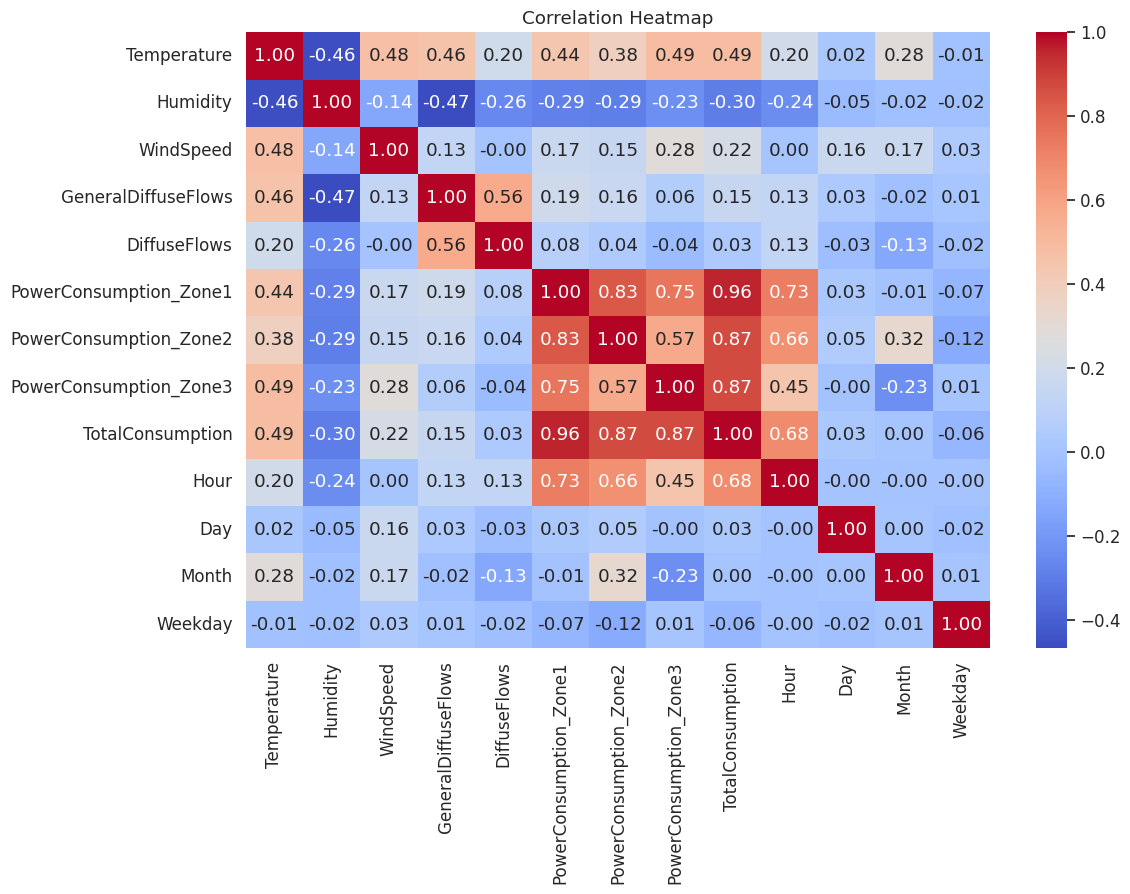

In [15]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

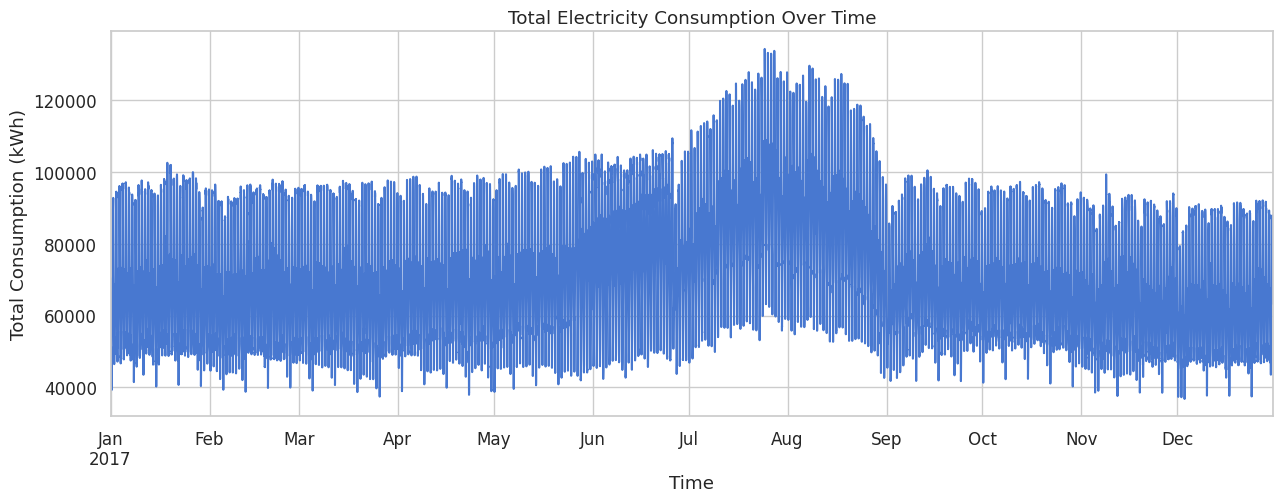

In [16]:
# Time series plot for total consumption
plt.figure(figsize=(15, 5))
df['TotalConsumption'].plot()
plt.title("Total Electricity Consumption Over Time")
plt.xlabel("Time")
plt.ylabel("Total Consumption (kWh)")
plt.grid(True)
plt.show()


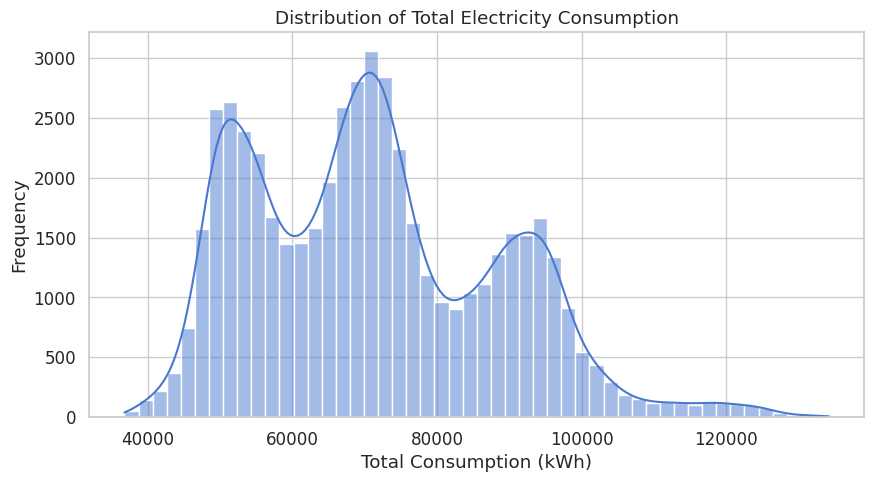

In [17]:
# Distribution plot of Total Consumption
plt.figure(figsize=(10, 5))
sns.histplot(df['TotalConsumption'], bins=50, kde=True)
plt.title("Distribution of Total Electricity Consumption")
plt.xlabel("Total Consumption (kWh)")
plt.ylabel("Frequency")
plt.show()


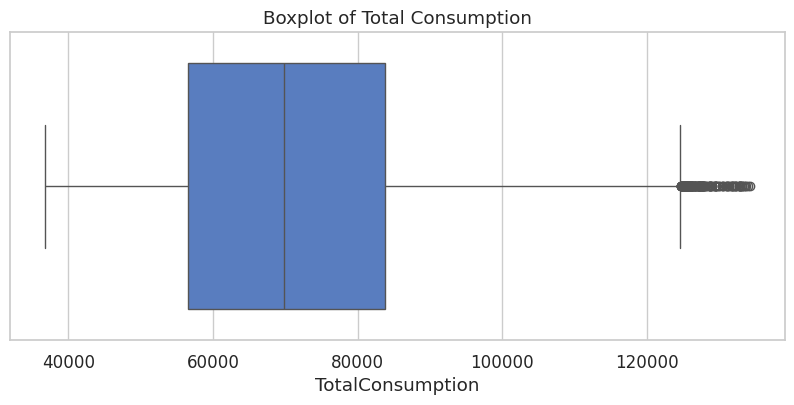

In [18]:
# Boxplot for outlier detection
plt.figure(figsize=(10, 4))
sns.boxplot(x=df['TotalConsumption'])
plt.title("Boxplot of Total Consumption")
plt.show()

In [19]:
missing_values

,0
Temperature,0
Humidity,0
WindSpeed,0
GeneralDiffuseFlows,0
DiffuseFlows,0
PowerConsumption_Zone1,0
PowerConsumption_Zone2,0
PowerConsumption_Zone3,0
TotalConsumption,0
Hour,0


In [21]:
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from prophet import Prophet
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.callbacks import EarlyStopping
import warnings
warnings.filterwarnings('ignore')

In [22]:
# Create daily aggregates for modeling
daily_df = df.resample('D').mean()


In [23]:
# Create lag features
for lag in [1, 2, 3, 7, 14, 30]:
    daily_df[f'Lag_{lag}_TotalConsumption'] = daily_df['TotalConsumption'].shift(lag)


In [24]:
# Create rolling window features
for window in [7, 14, 30]:
    daily_df[f'Rolling_Mean_{window}'] = daily_df['TotalConsumption'].rolling(window=window).mean()
    daily_df[f'Rolling_Std_{window}'] = daily_df['TotalConsumption'].rolling(window=window).std()

In [25]:
# Remove rows with NaN values (due to lagging)
daily_df = daily_df.dropna()

In [26]:
# 5. Train-Test Split
# ==================
print("\nSplitting data into training and testing sets...")

# Use 80% for training, 20% for testing (maintain temporal order)
train_size = int(len(daily_df) * 0.8)
train_data = daily_df.iloc[:train_size]
test_data = daily_df.iloc[train_size:]

print(f"Training data shape: {train_data.shape}")
print(f"Testing data shape: {test_data.shape}")


Splitting data into training and testing sets...
Training data shape: (267, 25)
Testing data shape: (67, 25)


In [27]:
# 6. Model Evaluation Function
# ==========================
def evaluate_model(actual, predicted, model_name):
    mae = mean_absolute_error(actual, predicted)
    mse = mean_squared_error(actual, predicted)
    rmse = np.sqrt(mse)
    r2 = r2_score(actual, predicted)
    mape = np.mean(np.abs((actual - predicted) / actual)) * 100

    print(f"\n{model_name} Performance Metrics:")
    print(f"MAE: {mae:.2f}")
    print(f"MSE: {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"MAPE: {mape:.2f}%")
    print(f"R²: {r2:.4f}")

    # Plot actual vs predicted
    plt.figure(figsize=(12, 6))
    plt.plot(actual.index, actual, label='Actual', color='blue')
    plt.plot(predicted.index, predicted, label='Predicted', color='red')
    plt.title(f'{model_name}: Actual vs Predicted')
    plt.xlabel('Date')
    plt.ylabel('Total Consumption (kWh)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f'{model_name.lower().replace(" ", "_")}_predictions.png')
    plt.close()

    # Plot Perfect Prediction Line (PPL)
    plt.figure(figsize=(10, 8))
    plt.scatter(actual, predicted)
    plt.plot([actual.min(), actual.max()], [actual.min(), actual.max()], 'k--', lw=2)
    plt.title(f'{model_name}: Perfect Prediction Line')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f'{model_name.lower().replace(" ", "_")}_ppl.png')
    plt.close()

    return {
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'MAPE': mape,
        'R2': r2
    }

In [28]:
# 7. Model Implementation
# ======================
print("\nImplementing forecasting models...")
# Model 1: Simple Moving Average (Baseline)
# ----------------------------------------
print("\nTraining Simple Moving Average (Baseline) model...")

test_data['SMA_Predictions'] = test_data['Rolling_Mean_7']
sma_metrics = evaluate_model(test_data['TotalConsumption'], test_data['SMA_Predictions'], 'Simple Moving Average')


Implementing forecasting models...

Training Simple Moving Average (Baseline) model...

Simple Moving Average Performance Metrics:
MAE: 1578.75
MSE: 4333836.59
RMSE: 2081.79
MAPE: 2.49%
R²: 0.1826


In [29]:
# Model 2: Seasonal Naive (Previous Week)
# -------------------------------------
print("\nTraining Seasonal Naive model...")

test_data['Seasonal_Naive_Predictions'] = test_data['Lag_7_TotalConsumption']
seasonal_naive_metrics = evaluate_model(test_data['TotalConsumption'], test_data['Seasonal_Naive_Predictions'], 'Seasonal Naive')


Training Seasonal Naive model...

Seasonal Naive Performance Metrics:
MAE: 1705.97
MSE: 4655500.63
RMSE: 2157.66
MAPE: 2.66%
R²: 0.1219


In [34]:
# Model 3: ARIMA Model
# ------------------
print("\nTraining ARIMA model...")

# Prepare data for ARIMA
y_train = train_data['TotalConsumption']
y_test = test_data['TotalConsumption']

# Fit ARIMA model (p=7 for weekly seasonality, d=1 for differencing, q=1 for MA component)
arima_model = ARIMA(y_train, order=(7, 1, 1))
arima_results = arima_model.fit()

# Make predictions
arima_predictions = arima_results.forecast(steps=len(test_data))
test_data['ARIMA_Predictions'] = arima_predictions.values

# Evaluate ARIMA model
arima_metrics = evaluate_model(test_data['TotalConsumption'], test_data['ARIMA_Predictions'], 'ARIMA')


Training ARIMA model...

ARIMA Performance Metrics:
MAE: 3432.91
MSE: 16790066.29
RMSE: 4097.57
MAPE: 5.45%
R²: -2.1668


In [35]:
# Model 4: SARIMA Model (with Seasonality)
# --------------------------------------
print("\nTraining SARIMA model...")

# Fit SARIMA model (with weekly seasonality)
sarima_model = SARIMAX(y_train, order=(2, 1, 2), seasonal_order=(1, 1, 1, 7))
sarima_results = sarima_model.fit(disp=False)

# Make predictions
sarima_predictions = sarima_results.forecast(steps=len(test_data))
test_data['SARIMA_Predictions'] = sarima_predictions

# Evaluate SARIMA model
sarima_metrics = evaluate_model(test_data['TotalConsumption'], test_data['SARIMA_Predictions'], 'SARIMA')


Training SARIMA model...

SARIMA Performance Metrics:
MAE: 1928.33
MSE: 5464941.09
RMSE: 2337.72
MAPE: 3.04%
R²: -0.0307


In [36]:
# Model 5: Facebook Prophet
# -----------------------
print("\nTraining Prophet model...")

# Prepare data for Prophet
prophet_train = train_data.reset_index()[['Datetime', 'TotalConsumption']]
prophet_train.columns = ['ds', 'y']

prophet_test = test_data.reset_index()[['Datetime']]
prophet_test.columns = ['ds']

# Fit Prophet model
prophet_model = Prophet(daily_seasonality=True, weekly_seasonality=True, yearly_seasonality=True)
prophet_model.add_regressor('Temperature')
prophet_model.add_regressor('Humidity')
prophet_model.add_regressor('WindSpeed')

# Add regressors
prophet_train['Temperature'] = train_data['Temperature'].values
prophet_train['Humidity'] = train_data['Humidity'].values
prophet_train['WindSpeed'] = train_data['WindSpeed'].values

prophet_test['Temperature'] = test_data['Temperature'].values
prophet_test['Humidity'] = test_data['Humidity'].values
prophet_test['WindSpeed'] = test_data['WindSpeed'].values

# Fit model and make predictions
prophet_model.fit(prophet_train)
prophet_forecast = prophet_model.predict(prophet_test)

# Add predictions to test data
test_data['Prophet_Predictions'] = prophet_forecast['yhat'].values

# Evaluate Prophet model
prophet_metrics = evaluate_model(test_data['TotalConsumption'], test_data['Prophet_Predictions'], 'Prophet')


Training Prophet model...


DEBUG:cmdstanpy:input tempfile: /tmp/tmput7uv_rb/iwvl6lnd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmput7uv_rb/5e3qxpvd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89005', 'data', 'file=/tmp/tmput7uv_rb/iwvl6lnd.json', 'init=/tmp/tmput7uv_rb/5e3qxpvd.json', 'output', 'file=/tmp/tmput7uv_rb/prophet_modelwx1427um/prophet_model-20250504225822.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:58:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:58:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



Prophet Performance Metrics:
MAE: 17196.22
MSE: 405643781.83
RMSE: 20140.60
MAPE: 26.70%
R²: -75.5082


In [37]:
# Model 6: Random Forest
# --------------------
print("\nTraining Random Forest model...")

# Prepare features
features = ['Temperature', 'Humidity', 'WindSpeed', 'Month_sin', 'Month_cos',
            'DayOfWeek_sin', 'DayOfWeek_cos', 'Lag_1_TotalConsumption',
            'Lag_7_TotalConsumption', 'Rolling_Mean_7', 'Rolling_Mean_30']

X_train = train_data[features]
y_train = train_data['TotalConsumption']
X_test = test_data[features]
y_test = test_data['TotalConsumption']

# Train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
test_data['RF_Predictions'] = rf_model.predict(X_test)

# Evaluate Random Forest model
rf_metrics = evaluate_model(test_data['TotalConsumption'], test_data['RF_Predictions'], 'Random Forest')


Training Random Forest model...


KeyError: "['Month_sin', 'Month_cos', 'DayOfWeek_sin', 'DayOfWeek_cos'] not in index"

In [38]:
df.head()

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3,TotalConsumption,Hour,Day,Month,Weekday
Datetime,,,,,,,,,,,,,
2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386,70425.53544,0,1,1,6
2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434,69320.84387,0,1,1,6
2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373,67803.22193,0,1,1,6
2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711,65489.23209,0,1,1,6
2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964,63650.44627,0,1,1,6


In [40]:
# Feature importance
feature_importance = pd.DataFrame({
    'Feature': features,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nRandom Forest Feature Importance:")
print(feature_importance)

NameError: name 'rf_model' is not defined

In [39]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Random Forest Feature Importance')
plt.tight_layout()
plt.savefig('rf_feature_importance.png')
plt.close()

NameError: name 'feature_importance' is not defined

<Figure size 1000x600 with 0 Axes>

In [42]:
# Model 6: Random Forest Implementation
# ---------------------------------
print("\nTraining Random Forest model...")

# First, create the cyclical features that are missing
def create_cyclical_features(df, col, period):
    """Create sine and cosine features to capture cyclical patterns."""
    df[f'{col}_sin'] = np.sin(2 * np.pi * df[col]/period)
    df[f'{col}_cos'] = np.cos(2 * np.pi * df[col]/period)
    return df

# Add cyclical features to both train and test sets
if 'Month_sin' not in train_data.columns:
    train_data = create_cyclical_features(train_data, 'Month', 12)
    test_data = create_cyclical_features(test_data, 'Month', 12)

if 'DayOfWeek_sin' not in train_data.columns:
    train_data = create_cyclical_features(train_data, 'Day', 31)  # For day of month
    test_data = create_cyclical_features(test_data, 'Day', 31)

    # Create day of week if it doesn't exist
    if 'DayOfWeek' not in train_data.columns:
        train_data['DayOfWeek'] = pd.to_datetime(train_data.index).dayofweek
        test_data['DayOfWeek'] = pd.to_datetime(test_data.index).dayofweek

    train_data = create_cyclical_features(train_data, 'DayOfWeek', 7)
    test_data = create_cyclical_features(test_data, 'DayOfWeek', 7)

# Verify features exist before proceeding
available_features = [col for col in features if col in train_data.columns]
if len(available_features) < len(features):
    missing_features = [col for col in features if col not in train_data.columns]
    print(f"Warning: Some features are still missing: {missing_features}")
    print("Proceeding with available features only.")

# Use only available features
features = available_features

# Prepare feature matrices
X_train = train_data[features]
y_train = train_data['TotalConsumption']
X_test = test_data[features]
y_test = test_data['TotalConsumption']

print(f"Training Random Forest with {len(features)} features: {features}")

# Train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
test_data['RF_Predictions'] = rf_model.predict(X_test)

# Evaluate Random Forest model
rf_metrics = evaluate_model(test_data['TotalConsumption'], test_data['RF_Predictions'], 'Random Forest')




Training Random Forest model...
Training Random Forest with 11 features: ['Temperature', 'Humidity', 'WindSpeed', 'Month_sin', 'Month_cos', 'DayOfWeek_sin', 'DayOfWeek_cos', 'Lag_1_TotalConsumption', 'Lag_7_TotalConsumption', 'Rolling_Mean_7', 'Rolling_Mean_30']

Random Forest Performance Metrics:
MAE: 1515.01
MSE: 3694361.74
RMSE: 1922.07
MAPE: 2.39%
R²: 0.3032


In [43]:
# Feature importance
feature_importance = pd.DataFrame({
    'Feature': features,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nRandom Forest Feature Importance:")
print(feature_importance)




Random Forest Feature Importance:
                   Feature  Importance
7   Lag_1_TotalConsumption    0.855233
9           Rolling_Mean_7    0.095245
8   Lag_7_TotalConsumption    0.019317
5            DayOfWeek_sin    0.008894
10         Rolling_Mean_30    0.004420
0              Temperature    0.004369
6            DayOfWeek_cos    0.003595
1                 Humidity    0.003147
2                WindSpeed    0.002879
4                Month_cos    0.001749
3                Month_sin    0.001152


In [44]:
# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Random Forest Feature Importance')
plt.tight_layout()
plt.savefig('rf_feature_importance.png')
plt.close()

In [45]:
# Model 7: XGBoost
# -------------
print("\nTraining XGBoost model...")

# Train XGBoost model
xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions
test_data['XGB_Predictions'] = xgb_model.predict(X_test)

# Evaluate XGBoost model
xgb_metrics = evaluate_model(test_data['TotalConsumption'], test_data['XGB_Predictions'], 'XGBoost')


Training XGBoost model...

XGBoost Performance Metrics:
MAE: 1737.17
MSE: 4753729.80
RMSE: 2180.30
MAPE: 2.73%
R²: 0.1034


In [46]:
# Model 8: LSTM Neural Network
# --------------------------
print("\nTraining LSTM Neural Network model...")

# Prepare data for LSTM (scaled and reshaped)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape for LSTM [samples, time steps, features]
X_train_lstm = X_train_scaled.reshape(X_train_scaled.shape[0], 1, X_train_scaled.shape[1])
X_test_lstm = X_test_scaled.reshape(X_test_scaled.shape[0], 1, X_test_scaled.shape[1])

# Build LSTM model
lstm_model = Sequential([
    LSTM(50, activation='relu', input_shape=(1, X_train_scaled.shape[1]), return_sequences=True),
    LSTM(50, activation='relu'),
    Dense(25, activation='relu'),
    Dense(1)
])

lstm_model.compile(optimizer='adam', loss='mse')



Training LSTM Neural Network model...


In [47]:
# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)



In [48]:
# Train model
lstm_history = lstm_model.fit(
    X_train_lstm, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=0
)


In [49]:
# Plot training history
plt.figure(figsize=(10, 6))
plt.plot(lstm_history.history['loss'], label='Training Loss')
plt.plot(lstm_history.history['val_loss'], label='Validation Loss')
plt.title('LSTM Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('lstm_training_history.png')
plt.close()


In [50]:
# Make predictions
test_data['LSTM_Predictions'] = lstm_model.predict(X_test_lstm).flatten()


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 166ms/step


In [51]:
# Evaluate LSTM model
lstm_metrics = evaluate_model(test_data['TotalConsumption'], test_data['LSTM_Predictions'], 'LSTM')


LSTM Performance Metrics:
MAE: 45032.35
MSE: 2077641963.91
RMSE: 45581.16
MAPE: 69.51%
R²: -390.8627


In [52]:
# 8. Model Comparison
# =================
print("\nComparing model performances...")

# Collect all metrics in a dataframe
models = ['Simple Moving Average', 'Seasonal Naive', 'ARIMA', 'SARIMA', 'Prophet', 'Random Forest', 'XGBoost', 'LSTM']
metrics = [sma_metrics, seasonal_naive_metrics, arima_metrics, sarima_metrics, prophet_metrics, rf_metrics, xgb_metrics, lstm_metrics]

comparison_df = pd.DataFrame(metrics, index=models)
print("\nModel Comparison:")
print(comparison_df)

# Plot RMSE comparison
plt.figure(figsize=(12, 8))
sns.barplot(x=comparison_df.index, y=comparison_df['RMSE'])
plt.title('RMSE Comparison Across Models')
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('model_rmse_comparison.png')
plt.close()



Comparing model performances...

Model Comparison:
                                MAE           MSE          RMSE       MAPE  \
Simple Moving Average   1578.747169  4.333837e+06   2081.786875   2.489194   
Seasonal Naive          1705.965087  4.655501e+06   2157.660915   2.655529   
ARIMA                   3432.908476  1.679007e+07   4097.568338   5.445652   
SARIMA                  1928.329725  5.464941e+06   2337.721345   3.038569   
Prophet                17196.218085  4.056438e+08  20140.600334  26.700386   
Random Forest           1515.005976  3.694362e+06   1922.072251   2.389596   
XGBoost                 1737.174171  4.753730e+06   2180.304979   2.730726   
LSTM                   45032.349423  2.077642e+09  45581.157992  69.512624   

                               R2  
Simple Moving Average    0.182598  
Seasonal Naive           0.121929  
ARIMA                   -2.166764  
SARIMA                  -0.030739  
Prophet                -75.508211  
Random Forest            0.30

In [53]:
# Plot R² comparison
plt.figure(figsize=(12, 8))
sns.barplot(x=comparison_df.index, y=comparison_df['R2'])
plt.title('R² Comparison Across Models')
plt.xlabel('Model')
plt.ylabel('R²')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('model_r2_comparison.png')
plt.close()


Visualizing best model predictions...

Best performing model: Random Forest


KeyError: 'Random_Forest_Predictions'

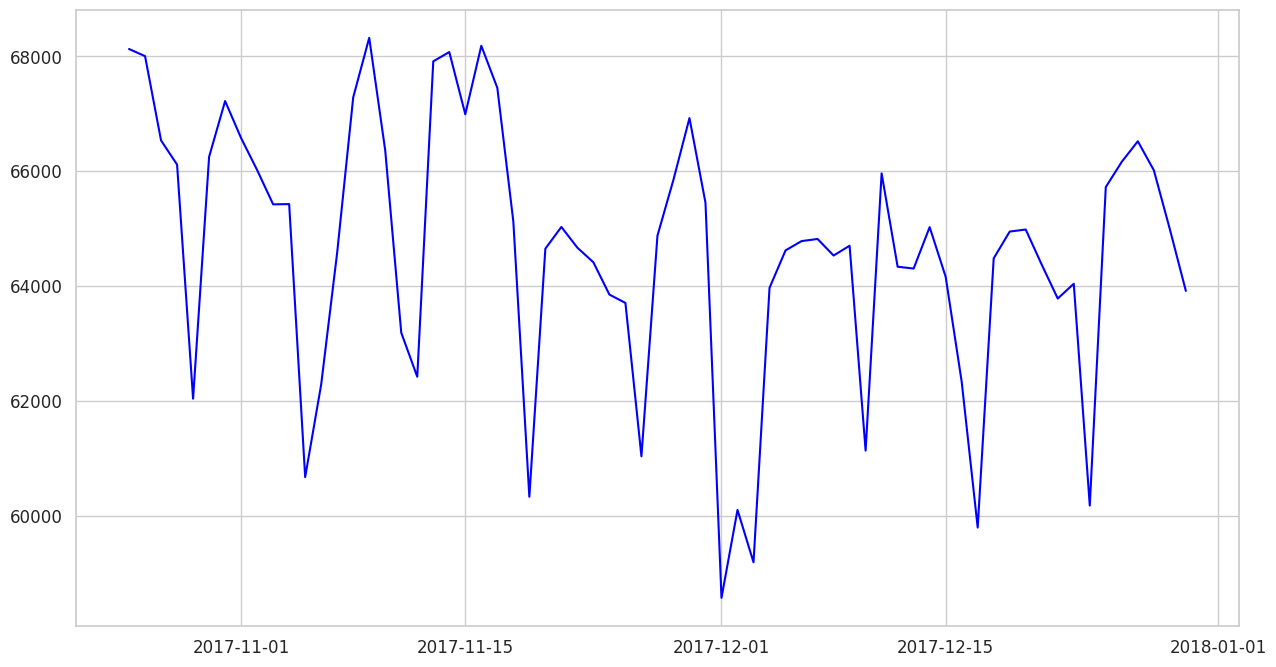

In [54]:
# 9. Final Model Selection and Visualization
# =======================================
print("\nVisualizing best model predictions...")

# Identify best model (based on RMSE)
best_model_index = comparison_df['RMSE'].idxmin()
best_model = best_model_index
best_model_col = f'{best_model.replace(" ", "_")}_Predictions'

print(f"\nBest performing model: {best_model}")

# Create a comprehensive plot for the best model
plt.figure(figsize=(15, 8))
plt.plot(test_data.index, test_data['TotalConsumption'], label='Actual', color='blue')
plt.plot(test_data.index, test_data[best_model_col], label=f'{best_model} Predictions', color='red')
plt.title(f'Best Model ({best_model}): Actual vs Predicted Energy Consumption')
plt.xlabel('Date')
plt.ylabel('Total Consumption (kWh)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('best_model_comparison.png')
plt.close()


In [55]:
# 10. Feature Importance Analysis
# ============================
print("\nAnalyzing feature importance for the best model...")

# If best model is Random Forest or XGBoost, show feature importance
if best_model in ['Random Forest', 'XGBoost']:
    if best_model == 'Random Forest':
        importance = rf_model.feature_importances_
    else:
        importance = xgb_model.feature_importances_

    feature_importance = pd.DataFrame({
        'Feature': features,
        'Importance': importance
    }).sort_values('Importance', ascending=False)

    print("\nFeature Importance:")
    print(feature_importance)

    plt.figure(figsize=(12, 8))
    sns.barplot(x='Importance', y='Feature', data=feature_importance)
    plt.title(f'{best_model} Feature Importance')
    plt.tight_layout()
    plt.savefig('best_model_feature_importance.png')
    plt.close()



Analyzing feature importance for the best model...

Feature Importance:
                   Feature  Importance
7   Lag_1_TotalConsumption    0.855233
9           Rolling_Mean_7    0.095245
8   Lag_7_TotalConsumption    0.019317
5            DayOfWeek_sin    0.008894
10         Rolling_Mean_30    0.004420
0              Temperature    0.004369
6            DayOfWeek_cos    0.003595
1                 Humidity    0.003147
2                WindSpeed    0.002879
4                Month_cos    0.001749
3                Month_sin    0.001152


In [56]:
# 11. Conclusion
# ============
print("\nModel development completed!")
print(f"Best model: {best_model} with RMSE: {comparison_df.loc[best_model, 'RMSE']:.2f}")
print(f"This model can be used for forecasting future energy consumption in Morocco.")


Model development completed!
Best model: Random Forest with RMSE: 1922.07
This model can be used for forecasting future energy consumption in Morocco.


In [57]:
# 12. Future Recommendations
# =======================
print("\nFuture recommendations:")
print("1. Incorporate more external variables like economic indicators and events")
print("2. Implement ensemble methods combining multiple models")
print("3. Develop separate models for different consumption zones")
print("4. Create a real-time forecasting pipeline for operational use")
print("5. Expand the time window of analysis to capture longer-term patterns")


Future recommendations:
1. Incorporate more external variables like economic indicators and events
2. Implement ensemble methods combining multiple models
3. Develop separate models for different consumption zones
4. Create a real-time forecasting pipeline for operational use
5. Expand the time window of analysis to capture longer-term patterns
